Created on Wed Jan 16 16:22 2019

Infer an estimate of the summer bare ice surface brightness temperature

@author: Clara Burgard

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

In [2]:
inputpath = '/work/mh0033/m300411/SatSim/WORK_DATA/observations/'
plot_path = '/work/mh0033/m300411/SatSim/PLOTS/'

READ IN RRDP DATA

In [4]:
data = pd.read_table(inputpath+'SMAP-vs-SMOS-vs-ASCAT-vs-AMSR-vs-ERA-vs-UB_MERIS_MPF_2011_cl005+001_75km_all_RRDB.text',header=1,delimiter=',')

melt_ponds = data['MPF']
TBV = data['6.9V']
time = pd.to_datetime(data['time'])

TBV[TBV=='  noval'] = np.nan
TBV_new = pd.to_numeric(TBV.str.strip(), errors='coerce')

/home/mpim/m300411/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


PLOT FIGURE 2

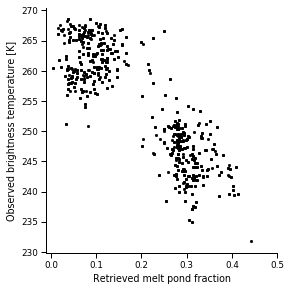

In [5]:
sns.set_context('paper')
plt.figure(figsize=(8.27/2,8.27/2))
plt.scatter(melt_ponds[TBV_new>210].values,TBV_new[TBV_new>210].values,s=5,c='k',marker='o')
plt.xlabel('Retrieved melt pond fraction')
plt.ylabel('Observed brightness temperature [K]')
plt.xlim(-0.01,0.5)
#plt.axhline(y=262.29,xmin=0,xmax=0.4,c='grey',ls='--',linewidth=2)
sns.despine()
plt.tight_layout()
#plt.savefig(plot_path+'Figure2.pdf',bbox_inches='tight')


COMPUTE MEAN BRIGHTNESS TEMPERATURE FOR MELT POND FRACTIONS BELOW 0.2

In [6]:
print(TBV_new[(melt_ponds<0.2) & (TBV_new>210)].mean())
print(TBV_new[(melt_ponds<0.2) & (TBV_new>210)].std())

262.2942962962963
3.558895118775859
